## Exercise 07.1 - 07.2

## Autocorrelazione :
### I) Solido :
E' stata scelta una **Delta = 0.055** per avere un **accettanza = 50%**

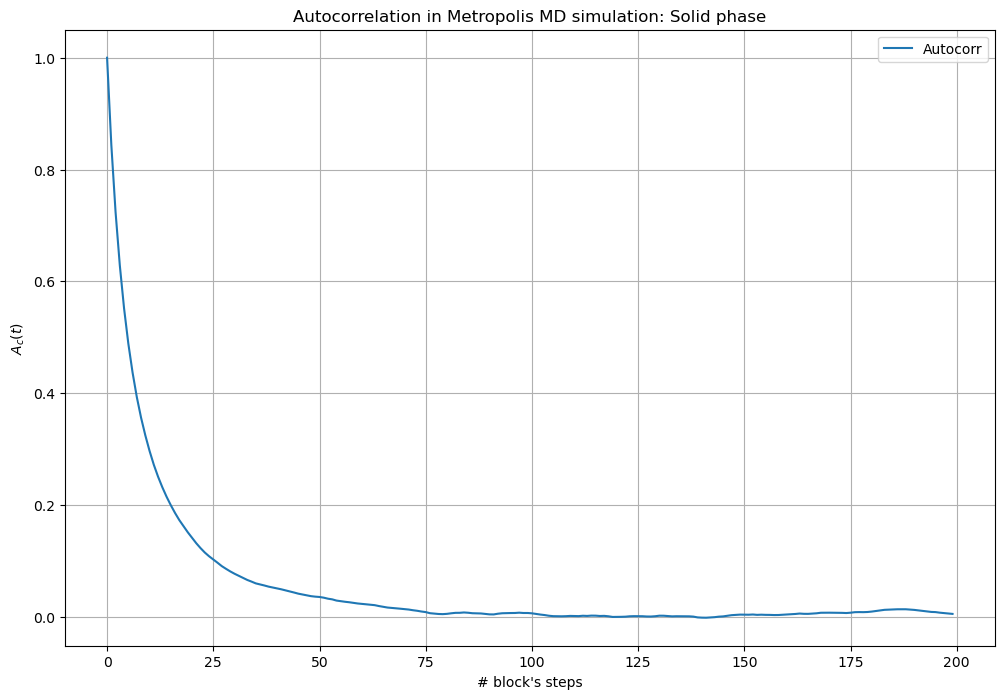

CPU times: total: 1min 11s
Wall time: 1min 36s


In [57]:
%%time
import matplotlib.pyplot as plt
import numpy as np

# Creazione della figura con 1 subplot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Numero massimo di passi
t_max = 500000

# Caricamento dei dati dal file potential_energy.dat nella cartella OUTPUT/Solid/
x, actual, ave, error = np.loadtxt("OUTPUT/Solid/potential_energy.dat", usecols=(0,1,2,3), unpack=True)

# Calcolo del quadrato dell'energia potenziale
actual_sq = actual * actual 

# Calcolo della varianza del dato
sigma_sq = (np.mean(actual_sq) - (np.mean(actual)**2))

# Inizializzazione delle liste per l'autocorrelazione e l'asse dei tempi
autocorr = []
t = []

# Calcolo dell'autocorrelazione per vari ritardi p
for p in range(200):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(t_max - p):
        sum1 += actual[i]*actual[i+p]
        sum2 += actual[i+p]
        sum3 += actual[i] 
    autocorr.append((sum1/(t_max - p) - sum3*sum2/((t_max - p)**2))/sigma_sq)
    t.append(p)

# Plot dell'autocorrelazione
ax1.plot(t, autocorr, label="Autocorr")
ax1.set_xlabel("# block's steps")
ax1.set_ylabel(r'$A_{c}(t)$')
ax1.set_title(r"Autocorrelation in Metropolis MD simulation: Solid phase")
ax1.grid(True)
ax1.legend()

# Mostra il plot
plt.show()


## II) Liquido

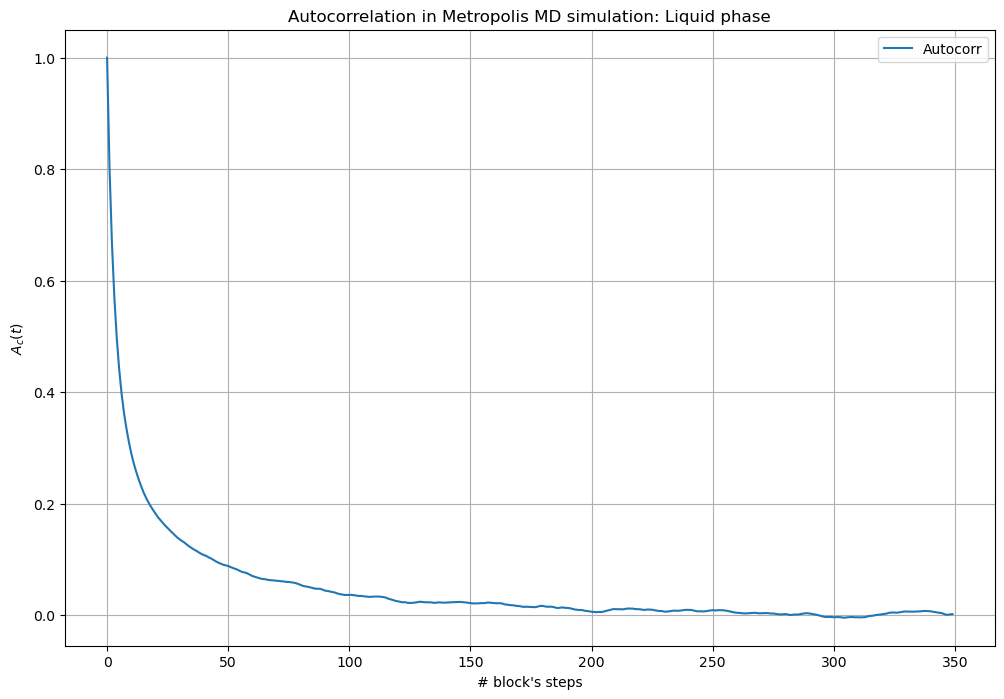

CPU times: total: 1min 56s
Wall time: 2min 54s


In [2]:
%%time
import matplotlib.pyplot as plt
import numpy as np

# Creazione della figura con 1 subplot di dimensioni 12x8 pollici
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Numero massimo di passi
t_max = 500000

# Caricamento dei dati dal file potential_energy.dat nella cartella OUTPUT/Liquid/
x, actual, ave, error = np.loadtxt(f"OUTPUT/Liquid/potential_energy.dat", usecols=(0,1,2,3), unpack=True)

# Calcolo del quadrato dell'energia potenziale
actual_sq = actual * actual 

# Calcolo della varianza del dato
sigma_sq = (np.mean(actual_sq) - (np.mean(actual)**2))

# Inizializzazione delle liste per l'autocorrelazione e l'asse dei tempi
autocorr = []
t = []

# Calcolo dell'autocorrelazione per vari ritardi p
for p in range(350):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(t_max - p):
        sum1 += actual[i]*actual[i+p]
        sum2 += actual[i+p]
        sum3 += actual[i] 
    autocorr.append((sum1/(t_max - p) - sum3*sum2/((t_max - p)**2))/sigma_sq)
    t.append(p)

# Plot dell'autocorrelazione
ax1.plot(t, autocorr, label="Autocorr")
ax1.set_xlabel("# block's steps")  # Etichetta dell'asse x
ax1.set_ylabel(r'$A_{c}(t)$')      # Etichetta dell'asse y con notazione matematica LaTeX
ax1.set_title(r"Autocorrelation in Metropolis MD simulation: Liquid phase")  # Titolo del plot
ax1.grid(True)  # Abilita la griglia sul plot
ax1.legend()    # Mostra la legenda

# Mostra il plot
plt.show()


### III) Gas
E' stata scelta una **Delta = 4.5** per avere un **accettanza = 61%**


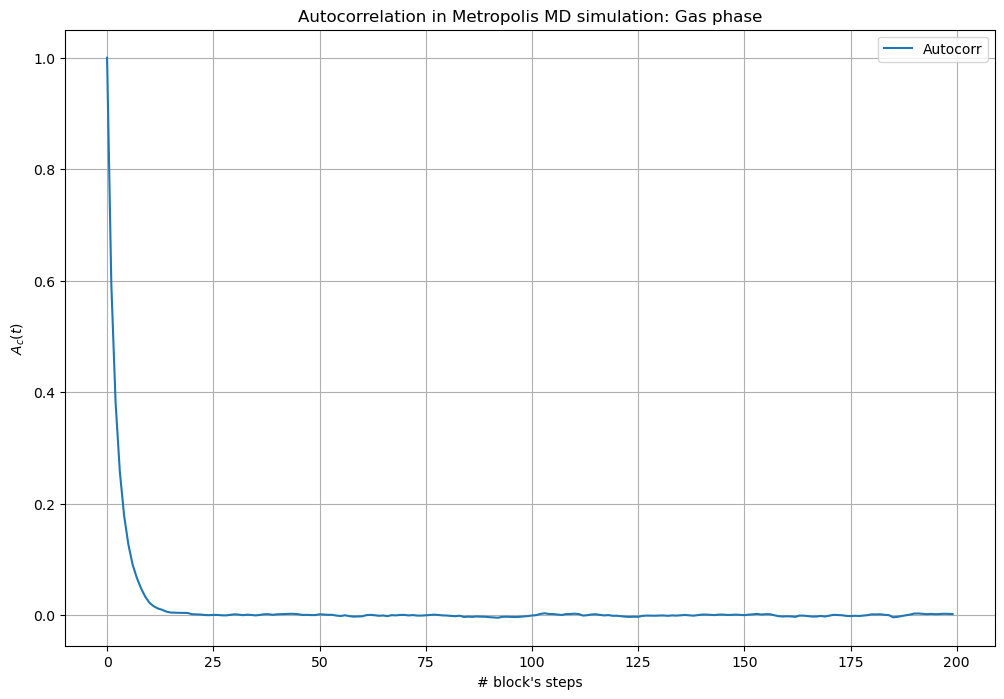

CPU times: total: 1min 8s
Wall time: 1min 43s


In [3]:
%%time
import matplotlib.pyplot as plt
import numpy as np

# Creazione della figura con 1 subplot di dimensioni 12x8 pollici
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Numero massimo di passi
t_max = 500000

# Caricamento dei dati dal file potential_energy.dat nella cartella OUTPUT/Gas/
x, actual, ave, error = np.loadtxt(f"OUTPUT/Gas/potential_energy.dat", usecols=(0,1,2,3), unpack=True)

# Calcolo del quadrato dell'energia potenziale
actual_sq = actual * actual 

# Calcolo della varianza del dato
sigma_sq = (np.mean(actual_sq) - (np.mean(actual)**2))

# Inizializzazione delle liste per l'autocorrelazione e l'asse dei tempi
autocorr = []
t = []

# Calcolo dell'autocorrelazione per vari ritardi p
for p in range(200):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(t_max - p):
        sum1 += actual[i]*actual[i+p]
        sum2 += actual[i+p]
        sum3 += actual[i] 
    autocorr.append((sum1/(t_max - p) - sum3*sum2/((t_max - p)**2))/sigma_sq)
    t.append(p)

# Plot dell'autocorrelazione
ax1.plot(t, autocorr, label="Autocorr")
ax1.set_xlabel("# block's steps")  # Etichetta dell'asse x
ax1.set_ylabel(r'$A_{c}(t)$')      # Etichetta dell'asse y con notazione matematica LaTeX
ax1.set_title(r"Autocorrelation in Metropolis MD simulation: Gas phase")  # Titolo del plot
ax1.grid(True)  # Abilita la griglia sul plot
ax1.legend()    # Mostra la legenda

# Mostra il plot
plt.show()


## Errore 
L'aspettativa in questa parte dell'esercizio sarebbe quella di vedere l'incertezza aumentare all'aumentare della dimensione del blocco fino a saturare ad un valore, per poi rimanere costante a quel valore. Chiaramente dai grafici riportati questa aspettativa non Ã¨ rispettata, a parte per la fase gassosa che sembra aumentare fino ad un certo valore, ma con delle oscillazioni troppo elevate. Si potrebbe provare ad aumentare il numero totale di misure M, al costo di rallentare notevolmente l'esecuzione del programma.
### Solido 

In [44]:
%%time
import numpy as np
import math

def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

# Caricamento dei dati dall'output del file potential_energy.dat nella fase solida
x, actual, ave, error_bar = np.loadtxt(f"OUTPUT/Solid/potential_energy.dat", usecols=(0,1,2,3),unpack=True)

last_err = []  # Lista per memorizzare le ultime incertezze statistiche

M = 50000  # Numero totale di misure
p = np.linspace(10, 5010, 101)  # Vettore di passi per la media a blocchi

for L in p:
    N = int(M / L)  # Numero di blocchi
    ave = np.zeros(N)  # Array per le medie di ogni blocco
    av2 = np.zeros(N)  # Array per i quadrati delle medie di ogni blocco
    sum_prog = np.zeros(N)  # Array per le somme progressive
    su2_prog = np.zeros(N)  # Array per le somme dei quadrati progressive
    err_prog = np.zeros(N)  # Array per le incertezze progressive

    # Calcolo delle medie di ogni blocco
    for i in range(N):
        sum1 = 0
        for j in range(int(L)):
            k = int(j + i * L)
            sum1 += actual[k]
        ave[i] = sum1 / L     # Calcolo della media r_i
        av2[i] = (ave[i]) ** 2  # Calcolo del quadrato della media (r_i)^2 
    
    # Calcolo delle somme progressive e delle incertezze progressive
    for i in range(N):
        for j in range(i + 1):
            sum_prog[i] += ave[j]  # SOMMA_{j=0,i} r_j
            su2_prog[i] += av2[j]  # SOMMA_{j=0,i} (r_j)^2
        sum_prog[i] /= (i + 1)  # Media cumulativa
        su2_prog[i] /= (i + 1)  # Media quadratica cumulativa
        err_prog[i] = error(sum_prog, su2_prog, i)  # Incertezza statistica
    if N!= 0:
        last_err.append(err_prog[N - 1])  # Memorizza l'ultima incertezza statistica

CPU times: total: 10.9 s
Wall time: 13.6 s


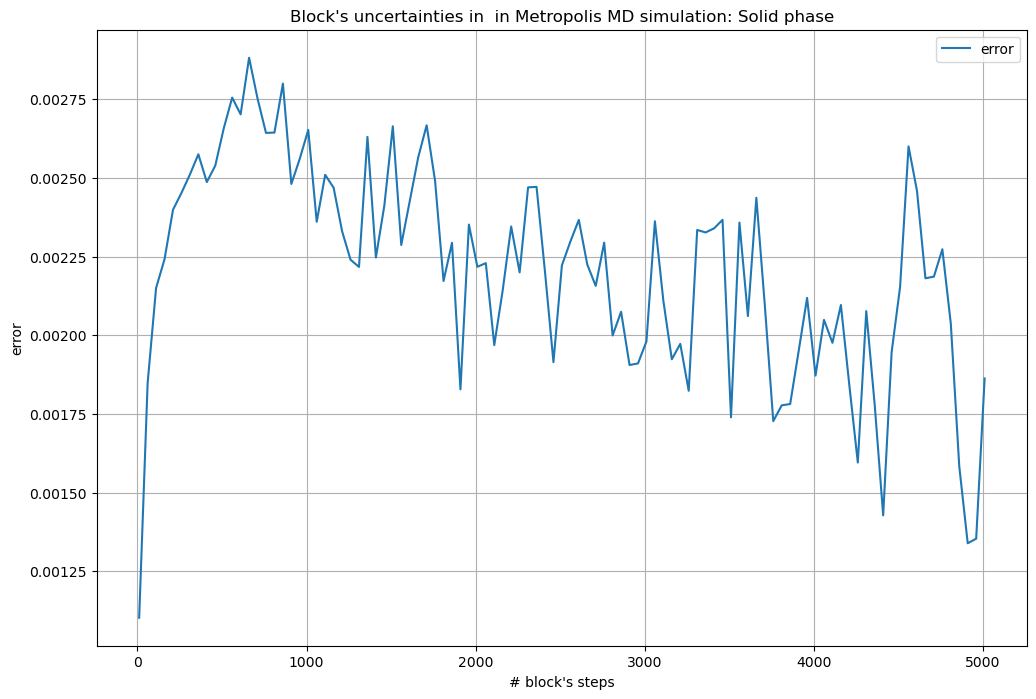

In [47]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.plot(p, last_err, label = "error")
ax1.set_xlabel("# block's steps")  # Etichetta dell'asse x
ax1.set_ylabel(r'error')      # Etichetta dell'asse y con notazione matematica LaTeX
ax1.set_title(r"Block's uncertainties in  in Metropolis MD simulation: Solid phase")  # Titolo del plot
ax1.grid(True)  # Abilita la griglia sul plot
ax1.legend()    # Mostra la legenda

### Gas

In [52]:
%%time
import numpy as np
import math

def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

# Caricamento dei dati dall'output del file potential_energy.dat nella fase solida
x, actual, ave, error_bar = np.loadtxt(f"OUTPUT/Gas/potential_energy.dat", usecols=(0,1,2,3),unpack=True)

last_err = []  # Lista per memorizzare le ultime incertezze statistiche

M = 100000  # Numero totale di misure
p = np.linspace(10, 5010, 101)  # Vettore di passi per la media a blocchi

for L in p:
    N = int(M / L)  # Numero di blocchi
    ave = np.zeros(N)  # Array per le medie di ogni blocco
    av2 = np.zeros(N)  # Array per i quadrati delle medie di ogni blocco
    sum_prog = np.zeros(N)  # Array per le somme progressive
    su2_prog = np.zeros(N)  # Array per le somme dei quadrati progressive
    err_prog = np.zeros(N)  # Array per le incertezze progressive

    # Calcolo delle medie di ogni blocco
    for i in range(N):
        sum1 = 0
        for j in range(int(L)):
            k = int(j + i * L)
            sum1 += actual[k]
        ave[i] = sum1 / L     # Calcolo della media r_i
        av2[i] = (ave[i]) ** 2  # Calcolo del quadrato della media (r_i)^2 
    
    # Calcolo delle somme progressive e delle incertezze progressive
    for i in range(N):
        for j in range(i + 1):
            sum_prog[i] += ave[j]  # SOMMA_{j=0,i} r_j
            su2_prog[i] += av2[j]  # SOMMA_{j=0,i} (r_j)^2
        sum_prog[i] /= (i + 1)  # Media cumulativa
        su2_prog[i] /= (i + 1)  # Media quadratica cumulativa
        err_prog[i] = error(sum_prog, su2_prog, i)  # Incertezza statistica
    if N!= 0:
        last_err.append(err_prog[N - 1])  # Memorizza l'ultima incertezza statistica

CPU times: total: 31.1 s
Wall time: 46.4 s


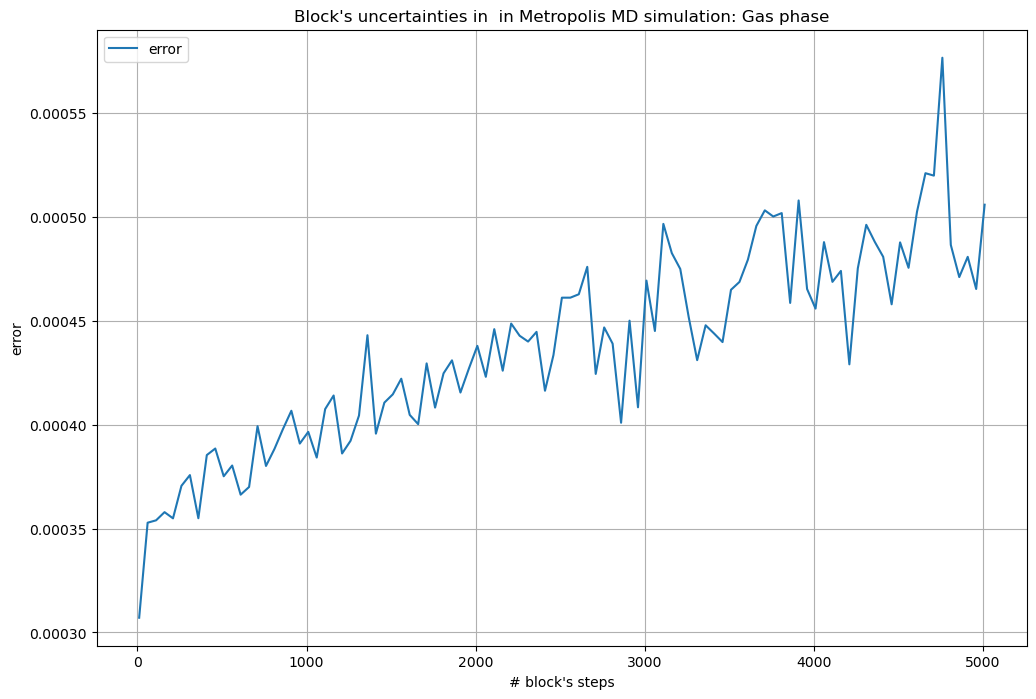

In [53]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.plot(p, last_err, label = "error")
ax1.set_xlabel("# block's steps")  # Etichetta dell'asse x
ax1.set_ylabel(r'error')      # Etichetta dell'asse y con notazione matematica LaTeX
ax1.set_title(r"Block's uncertainties in  in Metropolis MD simulation: Gas phase")  # Titolo del plot
ax1.grid(True)  # Abilita la griglia sul plot
ax1.legend()    # Mostra la legenda

### Liquido

In [60]:
%%time
import numpy as np
import math

def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2) / n)

# Caricamento dei dati dall'output del file potential_energy.dat nella fase solida
x, actual, ave, error_bar = np.loadtxt(f"OUTPUT/Liquid/potential_energy.dat", usecols=(0,1,2,3),unpack=True)

last_err = []  # Lista per memorizzare le ultime incertezze statistiche

M = 100000  # Numero totale di misure
p = np.linspace(10, 5010, 101)  # Vettore di passi per la media a blocchi

for L in p:
    N = int(M / L)  # Numero di blocchi
    ave = np.zeros(N)  # Array per le medie di ogni blocco
    av2 = np.zeros(N)  # Array per i quadrati delle medie di ogni blocco
    sum_prog = np.zeros(N)  # Array per le somme progressive
    su2_prog = np.zeros(N)  # Array per le somme dei quadrati progressive
    err_prog = np.zeros(N)  # Array per le incertezze progressive

    # Calcolo delle medie di ogni blocco
    for i in range(N):
        sum1 = 0
        for j in range(int(L)):
            k = int(j + i * L)
            sum1 += actual[k]
        ave[i] = sum1 / L     # Calcolo della media r_i
        av2[i] = (ave[i]) ** 2  # Calcolo del quadrato della media (r_i)^2 
    
    # Calcolo delle somme progressive e delle incertezze progressive
    for i in range(N):
        for j in range(i + 1):
            sum_prog[i] += ave[j]  # SOMMA_{j=0,i} r_j
            su2_prog[i] += av2[j]  # SOMMA_{j=0,i} (r_j)^2
        sum_prog[i] /= (i + 1)  # Media cumulativa
        su2_prog[i] /= (i + 1)  # Media quadratica cumulativa
        err_prog[i] = error(sum_prog, su2_prog, i)  # Incertezza statistica
    if N!= 0:
        last_err.append(err_prog[N - 1])  # Memorizza l'ultima incertezza statistica

CPU times: total: 36.7 s
Wall time: 43.9 s


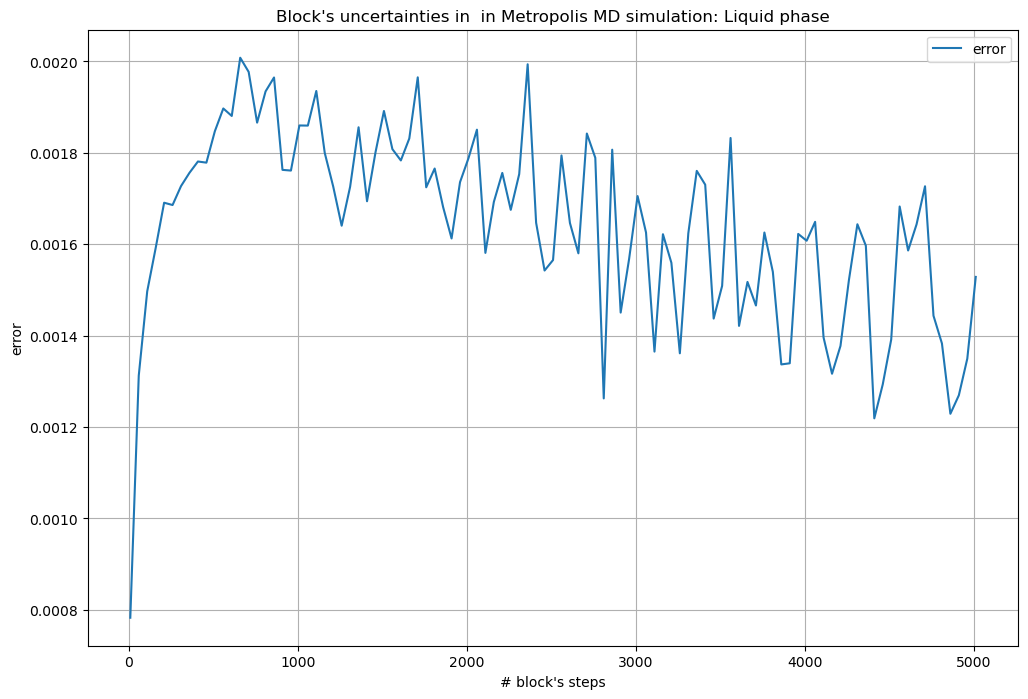

In [61]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.plot(p, last_err, label = "error")
ax1.set_xlabel("# block's steps")  # Etichetta dell'asse x
ax1.set_ylabel(r'error')      # Etichetta dell'asse y con notazione matematica LaTeX
ax1.set_title(r"Block's uncertainties in  in Metropolis MD simulation: Liquid phase")  # Titolo del plot
ax1.grid(True)  # Abilita la griglia sul plot
ax1.legend()    # Mostra la legenda